In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from termcolor import colored
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [3]:
def get_train_test_df(df, test_size=0.2):
    df.drop(['city','enrollee_id'], inplace = True, axis = 1)
    df_train, df_test = train_test_split(df, test_size = test_size)
    df_train.reset_index(inplace=True, drop=True)
    df_test.reset_index(inplace=True, drop=True)
    return df_train,df_test

In [4]:
data = pd.read_csv('DATA/aug_train.csv')
train_data, test_data = get_train_test_df(data)

In [5]:
def get_percent(df):
    temp=[]
    i=0
    for i in range (len(df[0])):
        temp.append((df[0][i]+df[1][i])/(df[0][-1]+df[1][-1])*100)
    return temp

In [6]:
def getData(name_column):
    df =pd.crosstab(index=train_data[name_column], columns=train_data['target'], margins=True)
    df_percent =pd.crosstab(index=train_data[name_column], columns=train_data['target'], margins=True, normalize='index')*100
    df_percent['Percent total']=get_percent(df)
    return df,df_percent

In [7]:
def discrete_column(df):
    discrete_col=[]
    cols=df.columns
    (train_data.dtypes=='0').values
    for col in cols:
        discrete_col.append(col)
    return discrete_col

In [8]:
def get_crosstable(df):
    discrete_col = discrete_column(df)
    output_col = 'target'
    discrete_col.remove(output_col)
    for col in discrete_col:
        c = pd.crosstab(index=df[col], columns=df[output_col], margins=True)
        p=pd.crosstab(index=df[col], columns=df[output_col], normalize=True)*100
        print("Cross table between ", colored(output_col,'green',attrs=['bold']), "and ", colored(col,'red',attrs=['bold']),"\n")
        print(c)
        print("\n")
        print(p)
        print("\n\n\n")

In [9]:
def draw_by_column(namecolumn,df):
    colorblind_palette = sns.color_palette("colorblind")
    plt.figure(figsize=(12,6.5)) 
    plt.title(namecolumn, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(x = namecolumn, data=df[[namecolumn]], palette=colorblind_palette)
    ax.bar_label(ax.containers[0])
    plt.show()

In [10]:
def draw_plt(name_column):
    figure = plt.figure(figsize=(25,8))
    df = pd.read_csv('DATA/aug_train.csv')
    sns.kdeplot(x=df[df['target']==0][name_column],label="Not looking for a job")
    sns.kdeplot(x=df[df['target']==1][name_column],label="Looking for a job")
    plt.legend(prop=dict(size=10))
    plt.title("city_development_index")
    plt.tight_layout()
    plt.show()

# Phân Tích Nhân sự - Sự thay đổi công việc của các nhà khoa học dữ liệu

# Tóm tắt

Mục tiêu của nghiên cứu nhằm xác định yếu tố nào ảnh hướng đến quyết định thay đổi công việc của các nhà Khoa học dữ liệu?, Các yếu tố ảnh hưởng như thế nào tới lựa chọn thay đổi công việc của ứng viên?. 
Nghiên cứu này phân tích dựa vào 19158 mẫu dựa trên khảo sát dữ liệu từ nền tảng Kaggle. 
Kết quả khảo sát cho thấy có 10 yếu tố gồm: Chỉ số phát triển của thành phố, Giới tính, Kinh nghiệm, Loại khoá học đại học, Trình độ học vấn, Ngành học chính, Tổng kinh nghiệm, Số lượng nhân viên của công ty hiện tại, Sự khác biệt về số năm giữa công việc trước đây và công việc hiện tại, Số giờ đào tạo đã hoàn thành.
Kết quả khảo sát cho thấy có 10 yếu tố gồm: Chỉ số phát triển của thành phố, Giới tính, Kinh nghiệm, Loại khoá học đại học, Trình độ học vấn, Ngành học chính, Tổng kinh nghiệm, Số lượng nhân viên của công ty hiện tại, Sự khác biệt về số năm giữa công việc trước đây và công việc hiện tại, Số giờ đào tạo đã hoàn thành.
Từ khóa: Các yếu tố ảnh hưởng, Dự định thay đổi việc - tìm kiếm công việc mới, Làm việc cho công ty. 

# 1. Giới thiệu

## Bối cảnh 
Một công ty hoạt động trong lĩnh vực Dữ liệu lớn và Khoa học Dữ liệu muốn thuê các nhà khoa học dữ liệu trong số những người vượt qua một số khóa học do công ty tiến hành tổ chức. Nhiều người đăng ký đào tạo của công ty và Công ty muốn biết những ứng viên nào trong số này thực sự muốn làm việc cho công ty sau khi đào tạo hoặc đang tìm việc làm mới vì nó giúp giảm chi phí và thời gian cũng như chất lượng đào tạo hoặc việc lên kế hoạch cho các khóa học và phân loại ứng viên. 

## Mục đích: 
Dự đoán xác suất ứng viên tìm kiếm công việc mới hoặc sẽ làm việc cho công ty, cũng như giải thích các yếu tố gây ảnh hưởng đến quyết định của nhân viên.


## Nội dung
- Câu hỏi nghiên cứu chung: Yếu tố nào ảnh hướng đến quyết định thay đổi công việc của các nhà Khoa học dữ liệu?, Các yếu tố ảnh hưởng như thế nào tới lựa chọn thay đổi công việc của ứng viên?
- Về dữ liệu, nhóm sử dụng dữ liệu có sẵn trên nền tảng Kaggle. 
- Dữ liệu được thu thập bằng cách tiến hành quan sát thí nghiệm về việc cho những ứng viên tham gia khóa học.
- Các trường hợp xảy ra: 
    + Ứng viên thực sự muốn làm việc cho công ty
    + Ứng viên đang tìm công việc mới
- Các biến số: Chỉ số phát triển của thành phố, Giới tính, Kinh nghiệm, Loại khoá học đại học, Trình độ học vấn, Ngành học chính, Tổng kinh nghiệm, Số lượng nhân viên của công ty hiện tại, Sự khác biệt về số năm giữa công việc trước đây và công việc hiện tại, Số giờ đào tạo đã hoàn thành

# 2. Dữ liệu

- Biến kết quả: Những người tham gia thí nghiệm lựa chọn thay đổi công việc hay không (target)
- Biến giải thích: Chỉ số phát triển của thành phố, Giới tính, Kinh nghiệm, Loại khoá học đại học, Trình độ học vấn, Ngành học chính, Tổng kinh nghiệm, Số lượng nhân viên của công ty hiện tại, Sự khác biệt về số năm giữa công việc trước đây và công việc hiện tại, Số giờ đào tạo đã hoàn thành
- Phương pháp nghiên cứu: Nghiên cứu này sử dụng kết hợp hai phương
pháp nghiên cứu gồm nghiên cứu định tính, và nghiên cứu định lượng. 
- Phương pháp thống kê: Nghiên cứu mối liên hệ giữa các hiện tượng, dự đoán
- Nghiên cứu mối liên hệ giữa các biến giải thích và biến kết quả.

In [11]:
train_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.789,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,10/49,Pvt Ltd,>4,42,1.0
1,0.647,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,28,0.0
2,0.624,Male,Has relevent experience,Full time course,Masters,STEM,7,10000+,Public Sector,1,82,1.0
3,0.689,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,100-500,Funded Startup,1,11,0.0
4,0.624,NaN,No relevent experience,Full time course,High School,NaN,<1,NaN,NaN,never,111,0.0


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  15326 non-null  float64
 1   gender                  11729 non-null  object 
 2   relevent_experience     15326 non-null  object 
 3   enrolled_university     15021 non-null  object 
 4   education_level         14963 non-null  object 
 5   major_discipline        13105 non-null  object 
 6   experience              15267 non-null  object 
 7   company_size            10536 non-null  object 
 8   company_type            10380 non-null  object 
 9   last_new_job            14980 non-null  object 
 10  training_hours          15326 non-null  int64  
 11  target                  15326 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


# 3. Suy luận thống kê
## Các vấn đề
Mô hình nghiên cứu gồm có 10 biến dữ liệu độc lập. Tương ứng với 10 biến độc lập thì đưa ra 10 giả thuyết.
- Mối tương quan giữa city_development_index và target
- Mối tương quan giữa tranning_hours và target
- Biến gender

## Tổng quan dữ liệu

In [13]:
get_crosstable(train_data)

Cross table between  target and  city_development_index 

target                    0.0   1.0    All
city_development_index                    
0.4479999999999999          6    11     17
0.479                      10    12     22
0.487                       1     4      5
0.493                       6     6     12
0.512                       0     3      3
...                       ...   ...    ...
0.925                     112    18    130
0.926                     979   110   1089
0.939                     361    36    397
0.949                      51     5     56
All                     11534  3792  15326

[94 rows x 3 columns]


target                       0.0       1.0
city_development_index                    
0.448                   0.039149  0.071773
0.479                   0.065249  0.078298
0.487                   0.006525  0.026099
0.493                   0.039149  0.039149
0.512                   0.000000  0.019575
...                          ...       ...
0.924         

# 3.1. Chỉ số phát triển của thành phố

Biểu đồ cột

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


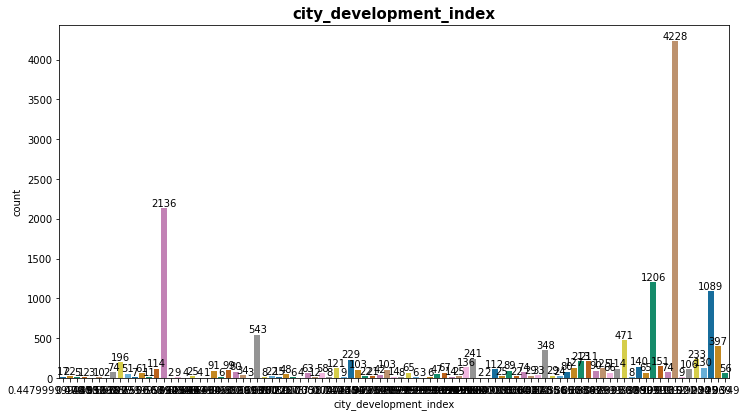

In [14]:

draw_by_column("city_development_index",train_data)

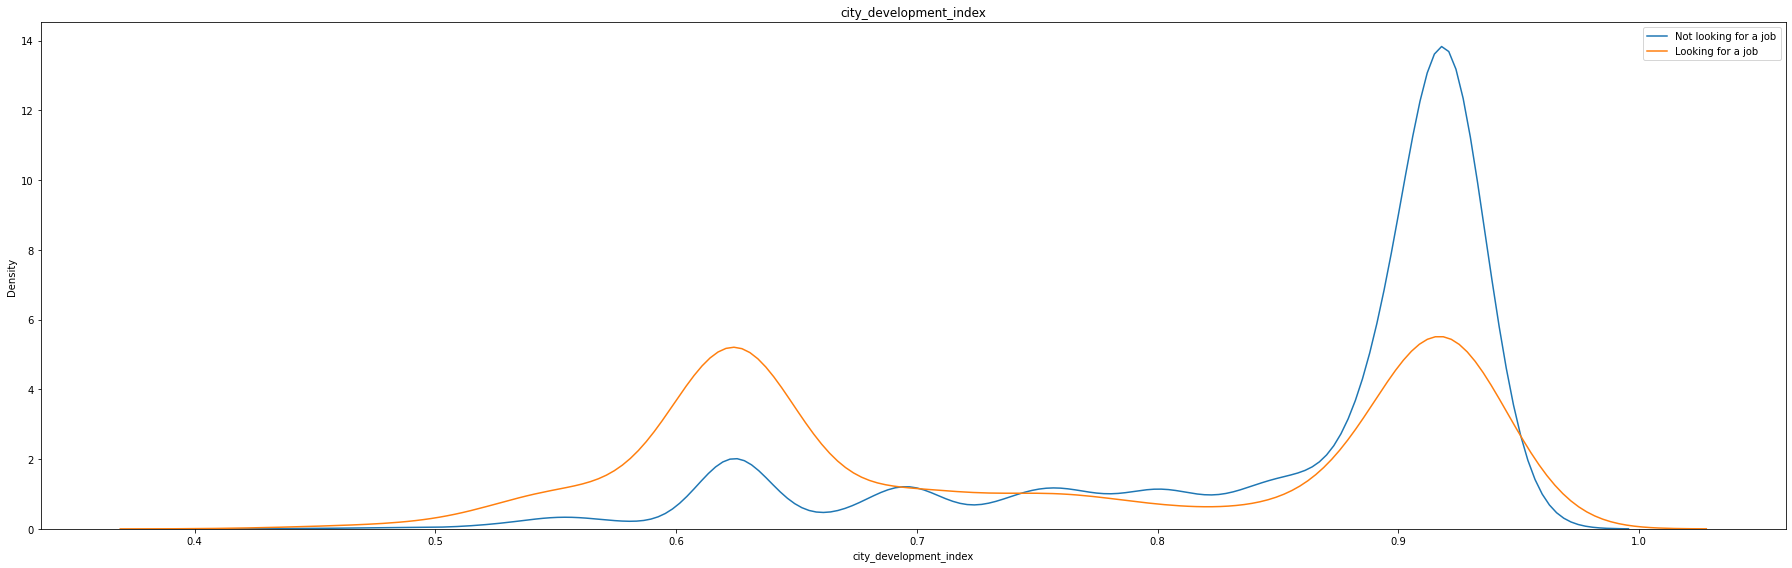

In [15]:
draw_plt('city_development_index')

=> 2 đường có sự chênh lệch lớn => city_development_index có ảnh hưởng đến việc lựa chọn thay đổi công việc

<AxesSubplot:>

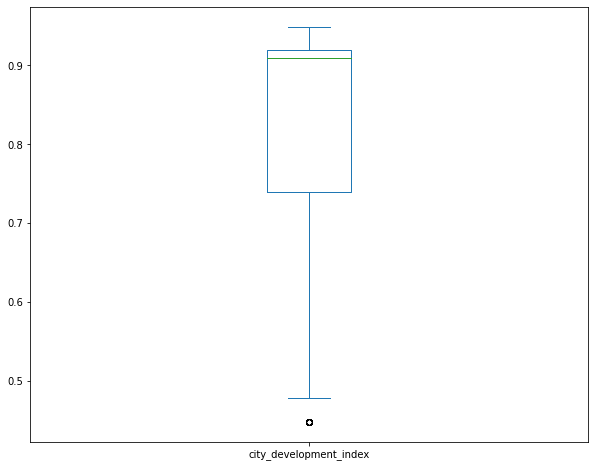

In [16]:
train_data[['city_development_index']].plot(kind='box', figsize= (10,8))

In [19]:
train_data.agg({'city_development_index': ['mean','median', 'std']})

,city_development_index
mean,0.829108
median,0.910000
std,0.123323


## 3.2 Thời gian hoàn thành đào tạo

Biểu đồ cột

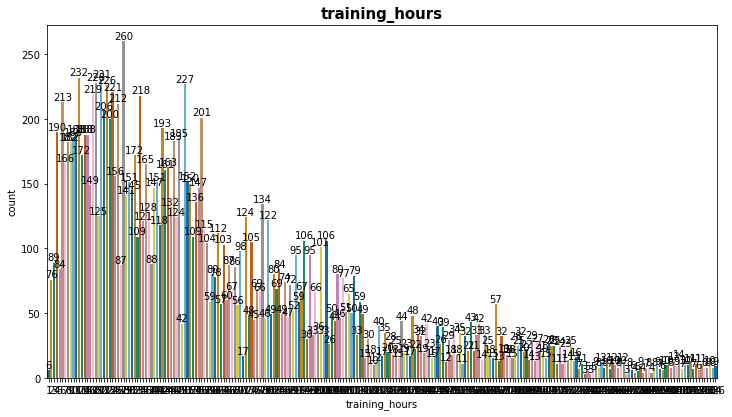

In [ ]:
draw_by_column("training_hours",train_data)

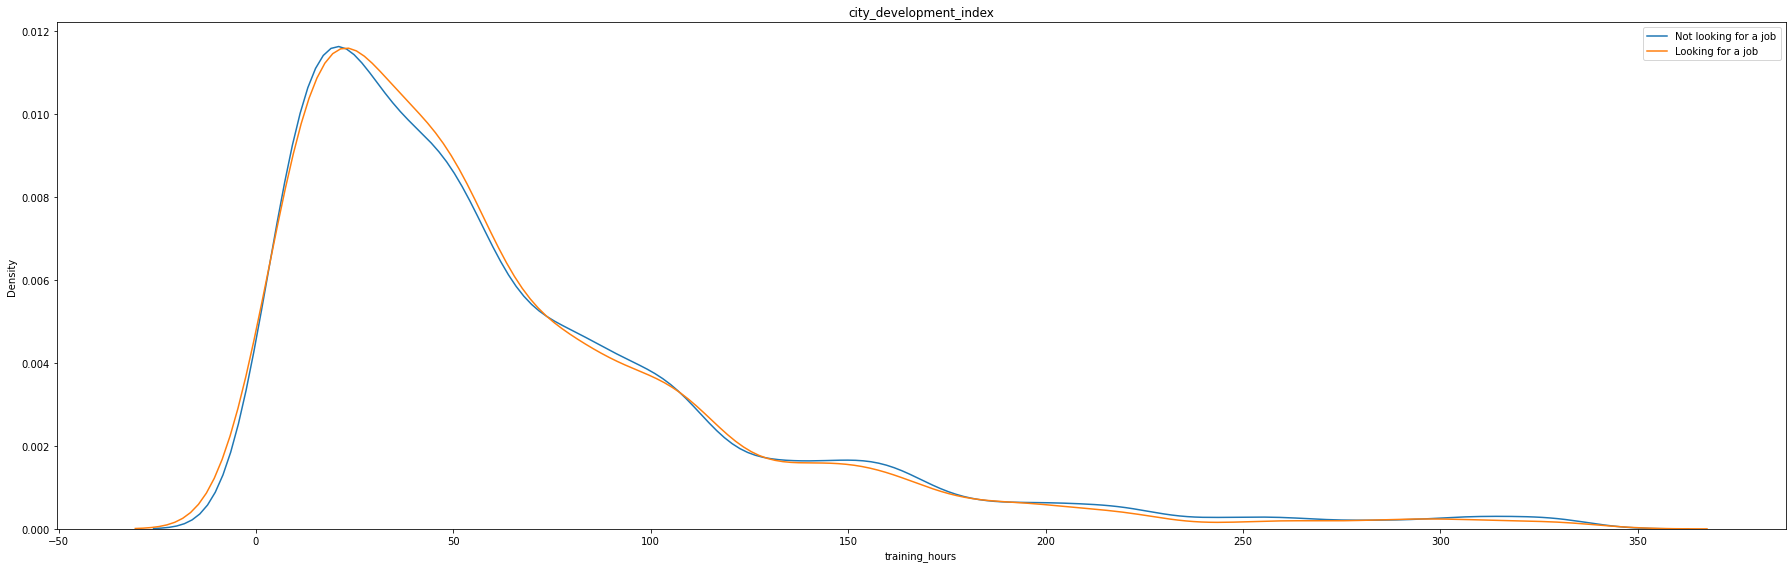

In [ ]:
draw_plt('training_hours')


=> 2 đường này gần giống nhau => thời gian hoàn thành đào tạo không ảnh hưởng đến việc thay đổi công việc

<AxesSubplot:>

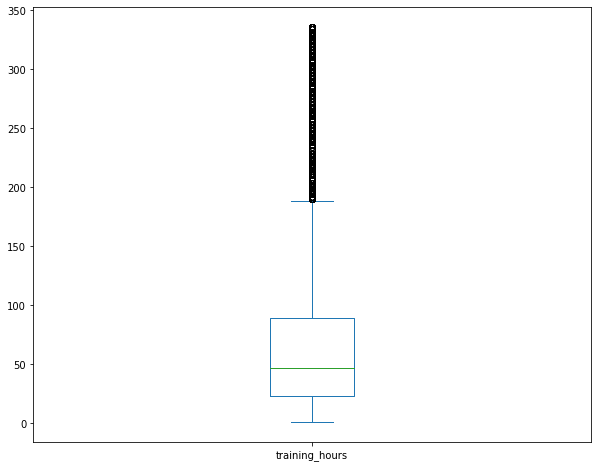

In [ ]:
train_data[['training_hours']].plot(kind='box', figsize= (10,8))

## 3.3. Giới tính

Biểu đồ cột

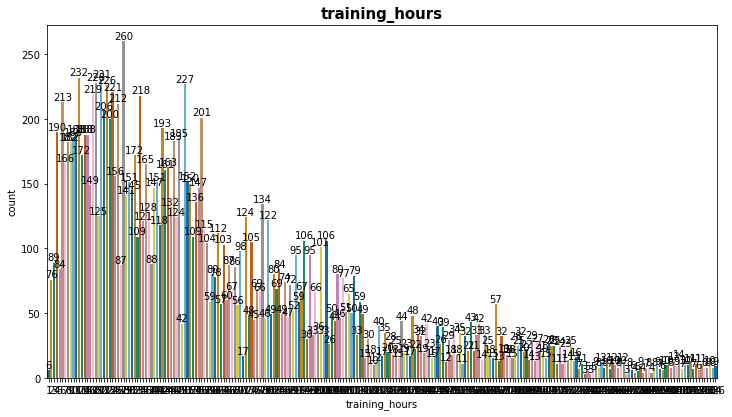

In [ ]:
draw_by_column("training_hours",train_data)

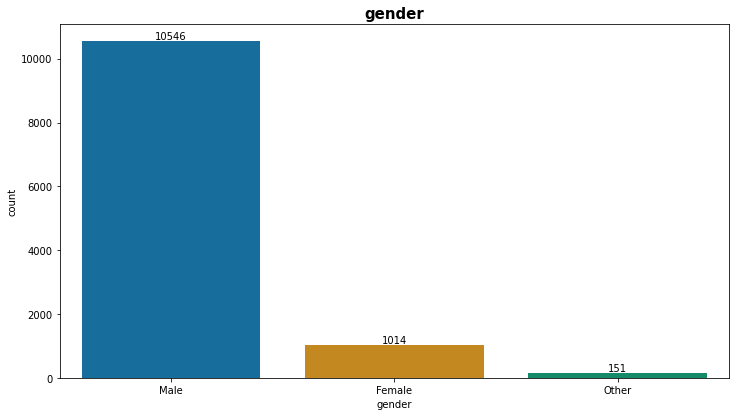

In [ ]:

draw_by_column("gender",train_data)

=> Mất cân bằng về số lượng giới tính trong mẫu

Giả thuyết: Giới tính không ảnh hưởng đến việc lựa chọn thay đổi công việc

In [ ]:
ct = pd.crosstab(train_data.target, train_data.gender)

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
obs = np.array([ct.iloc[0][:].values,
                  ct.iloc[1][:].values])
print('x^2:',chi2_contingency(obs)[0],'p_val:',chi2_contingency(obs)[1],'df:',chi2_contingency(obs)[2])

x^2: 7.602769343586839 p_val: 0.022339817115403372 df: 2


Giá trị p_val < 0.05 =>Giả thuyết bị bác bỏ

Để kiểm tra lại điều trên, ta sẽ thực hiện quan sát mối tương quan giữa gender và education_level

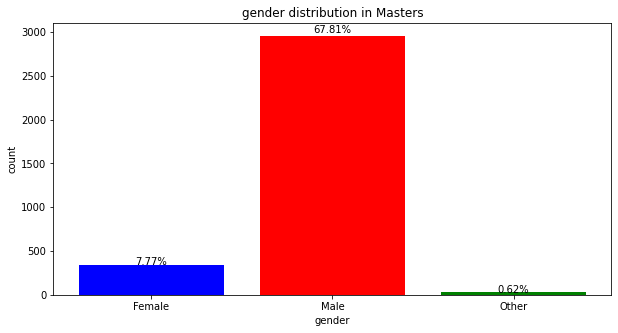

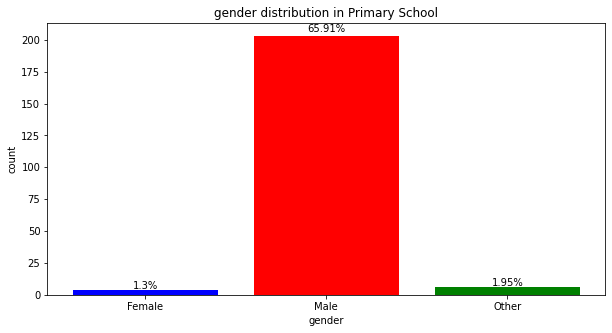

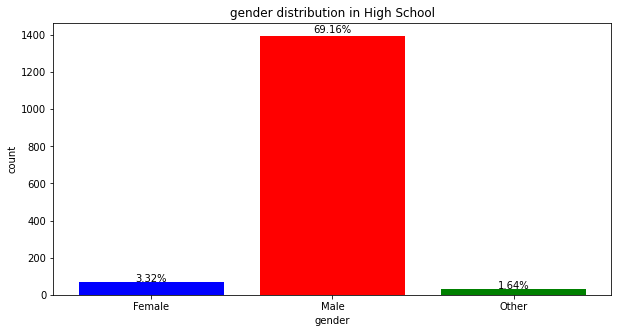

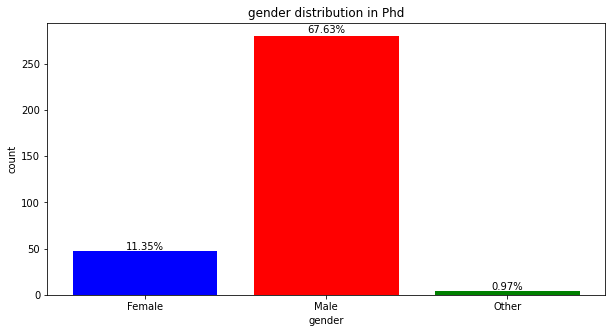

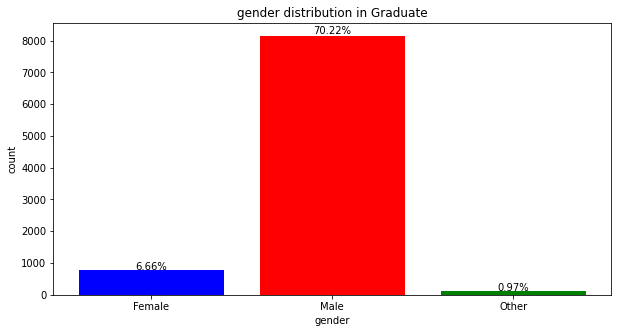

In [ ]:
df = pd.read_csv('DATA/aug_train.csv')
for l in set(df['education_level']):
  if str(l) == 'nan':
    continue
  res = df[df['education_level']==l].groupby('gender').count()['enrollee_id']
  
  #.sort_values('enrollee_id', ascending=False)

  plt.figure(figsize=(10,5))
  graph = plt.bar([str(i) for i in res.keys()], res.values, color=['blue', 'red', 'green'])
  plt.title('gender distribution in '+str(l))
  plt.xlabel('gender')
  plt.ylabel('count')


  i = 0
  for p in graph:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      
      plt.text(x+width/2,
              y+height*1.01+1,
              str(round(100*res.values[i]/df[df['education_level']==l]['target'].count(),2))+'%',
              ha='center'
              # , weight='bold'
              )
      i += 1
  plt.show()

=> Trình độ học vấn tăng lên thì tỉ lệ nữ giới cũng tăng